# PyOCRで文字認識を行い、言語指定をいろいろ試す

In [1]:
#coding:utf-8
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pyocr
import pyocr.builders

# matplotlibをJupyterでインライン表示するための宣言
%matplotlib inline

## 設定

In [176]:
NAMECARD_IMAGE_FOLDER = "../data/01_namecard/"
NAMECARD_DATA_FOLDER = "../data/02_namecard_data/"

## PyOCRのセットアップ

In [3]:
tools = pyocr.get_available_tools() # OCRツールの有無の確認
if len(tools) == 0:
    print("No OCR tool found")

# OCRツールを列挙してみる
print(f"pyocr tools count = {len(tools)}")
for tool_id in range(len(tools)):
    print(f"tool[{tool_id}].tool.get_name() = " + tools[tool_id].get_name())

pyocr tools count = 2
tool[0].tool.get_name() = Tesseract (sh)
tool[1].tool.get_name() = Tesseract (C-API)


#### ツールの設定と言語の列挙

In [4]:
pyocr_tool = tools[0]
print("use tool =" + (pyocr_tool.get_name()))

langs = pyocr_tool.get_available_languages() # 使用できる言語の確認
print("pyocr langs  = " + ", ".join(langs))

use tool =Tesseract (sh)
pyocr langs  = eng, eng_best, jpn, jpn_best, jpn_vert, osd


## 文字認識
言語をjpn、psm=1で認識

In [5]:
test_path = NAMECARD_IMAGE_FOLDER + "001_hugkun_yasubei.jpg"
test_img = Image.open(test_path)
txt = pyocr_tool.image_to_string(test_img, lang='jpn',             # 画像と言語を指定
    builder=pyocr.builders.TextBuilder(tesseract_layout=1))       # psmを指定する
print(txt)

⑲Hugku〝
磨 Huekunpata

HugkunData 代 表 取 締 役 / 代 表 取 締 役 会 長

鈴 木 康 元

Yasuharu Suzuki

〒⑨0④-0①0① 沖 縄 県 中 頭 那 北 谷 町 字 上 勢 頭 ⑧③⑦-⑧-②0⑥
TEL`0⑨0-⑨④③⑨ -⑧⑤③⑥ MAILisuzukl.yasuhal@hugkun.com
WEBihugkun.com


・ロゴは読めていない（これは仕方がない）<br>
・半角数字が丸数字に誤認識されてしまうことが多い<br>
・Hugkunの文字が消えている<br>
・「Mail:」や「WEB:」のコロンの部分がiになっている<br>

### jpn_bestでの文字認識

In [6]:
txt = pyocr_tool.image_to_string(test_img, lang='jpn_best',      # 画像と言語を指定
    builder=pyocr.builders.TextBuilder(tesseract_layout=1))          # psmを指定する
print(txt)

huekun
L_Huekunpata

HugkunData 代 表 取 締 役 / 代表 取締 役 会 長

鈴木 康 元

Yasuharu Suzuki

宣 904-0101 沖縄 県 中 頭 郡 北谷 町 字 上 勢 頭 837-8-206
TEL: 090-9439- 8536 MAIL:suzuki.yasuhal@hugkun.com
WEBihugkun.com


・数字の部分が丸数字で誤認識されることが多かったものが、jpn_bestでは丸数字は無くなっている（精度向上）<br>
・〒 (郵便記号)が「宣」に誤認識されている（精度ダウン）<br>
・全体では精度が上がっているように見える

### 複数言語を指定する

In [9]:
txt = pyocr_tool.image_to_string(test_img, lang='jpn+eng',        # 画像と言語を指定
    builder=pyocr.builders.TextBuilder(tesseract_layout=1))          # psmを指定する
print(txt)

⑲Hu9ku〝
磨 Huekunpata

HugkunData 代 表 取 締 役 / 代 表 取 締 役 会 長

鈴 木 康 元

Yasuharu Suzuki

〒⑨0④-0①0① 沖 縄 県 中 頭 那 北 谷 町 字 上 勢 頭 ⑧③⑦-⑧-②0⑥
TEL:090-9439-8536 MAIL:suzuki.yasuhal@hugkun.com
WEB: hugkun.com


## 言語ごとの実行時間を計測してみる

In [89]:
%%timeit
txt = pyocr_tool.image_to_string(test_img, lang='jpn',             # 画像と言語を指定
    builder=pyocr.builders.TextBuilder(tesseract_layout=1))       # psmを指定する

1.92 s ± 17.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [90]:
%%timeit
txt = pyocr_tool.image_to_string(test_img, lang='jpn_best',      # 画像と言語を指定
    builder=pyocr.builders.TextBuilder(tesseract_layout=1))          # psmを指定する

6.09 s ± 54.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [91]:
%%timeit
txt = pyocr_tool.image_to_string(test_img, lang='jpn+eng',        # 画像と言語を指定
    builder=pyocr.builders.TextBuilder(tesseract_layout=1))          # psmを指定する

2.67 s ± 6.71 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [92]:
%%timeit
txt = pyocr_tool.image_to_string(test_img, lang='eng',               # 画像と言語を指定
    builder=pyocr.builders.TextBuilder(tesseract_layout=1))          # psmを指定する

1.2 s ± 4.95 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [99]:
%%timeit
txt = pyocr_tool.image_to_string(test_img, lang='jpn_best+eng_best',               # 画像と言語を指定
    builder=pyocr.builders.TextBuilder(tesseract_layout=1))          # psmを指定する

7.23 s ± 26.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


・一番精度が良さそうに見えたjpn_bestがjpnの３倍以上遅く、実行速度にばらつきも大きい<br>
・jpn + engはjpnの約1.35倍と少し遅くなるだけ<br>
・一方でeng一つだけだと約0.65倍とかなり速い。日本語の分析速度が遅いことがわかる。<br>
・tesseract-ocrは呼び出すだけで0.4sほど時間がかかっていることがわかる（1.9ｓ+1.21s-2.69s=0.42s)<br>
　※プロセスの呼び出し速度や画像処理など、ある程度固定で時間が掛かる処理を行っていることが予測される。<br>

## 精度の計算(ゲシュタルトパターンマッチング)

In [17]:
import difflib
difflib.SequenceMatcher(None, "ABSOLUTE", "OBSOLETE").ratio()

0.75

## 精度の計算(独自実装)
・正解データの各行と比較し、最も精度の良かった値を集計して返す

In [177]:
test_data_path = NAMECARD_DATA_FOLDER + "001_hugkun_yasubei.txt"
y = ""
with open(test_data_path) as f:
    y = f.read()
y
# y = """
# Hugkun
# HugkunData

# HugkunData代表取締役 / Hugkun代表取締役会長

# 鈴木 康元

# Yasuharu Suzuki

# 〒 904-0101 沖縄県中頭郡北谷町字上勢頭 837-8-206
# TEL: 090-9439- 8536 MAIL:suzuki.yasuhal@hugkun.com
# WEB:hugkun.com
# """

'Hugkun\nHugkunData\n\nHugkunData代表取締役 / Hugkun代表取締役会長\n\n鈴木 康元\n\nYasuharu Suzuki\n\n〒 904-0101 沖縄県中頭郡北谷町字上勢頭 837-8-206\nTEL: 090-9439- 8536 MAIL:suzuki.yasuhal@hugkun.com\nWEB:hugkun.com'

In [178]:
# 一行分のスコア算出
def calc_line_ratio (line1:str, text2:[str]) -> float:
    max_score = -1
    for line2 in text2:
        max_score = max(max_score, difflib.SequenceMatcher(None, line1, line2).ratio())
    
    max_score *= len(line1)
    print(f"{line1} max_score={max_score}")
    return max_score

In [179]:
# 前処理
def preprocessing_text (text1:str) -> [str]:
    result = []
    text1_array = text1.split("\n") # 改行で区切る
    for line1 in text1_array:
        line1 = line1.replace(' ', '') # スペースは削除
        if len(line1) < 1:  # 空文字列の場合は何もしない。
            continue
        result.append(line1)
    return result

In [180]:
# 複数行計算（独自実装）
def calc_text_ratio (text1:str, text2:str) -> float:
    text1_array = preprocessing_text(text1)
    text2_array = preprocessing_text(text2)
    sum_score = 0
    sum_length = 0
    for line1 in text1_array:
        sum_score += calc_line_ratio(line1, text2_array)
        sum_length += len(line1)
    return sum_score/sum_length

## 言語ごとの精度の計算

In [181]:
txt_jpn = pyocr_tool.image_to_string(test_img, lang='jpn',         # 画像と言語を指定
    builder=pyocr.builders.TextBuilder(tesseract_layout=1))          # psmを指定する
ratio_jpn = calc_text_ratio(txt_jpn,y)
ratio_jpn

⑲Hugku〝 max_score=5.384615384615385
磨Huekunpata max_score=8.38095238095238
HugkunData代表取締役/代表取締役会長 max_score=20.346153846153847
鈴木康元 max_score=4.0
YasuharuSuzuki max_score=14.0
〒⑨0④-0①0①沖縄県中頭那北谷町字上勢頭⑧③⑦-⑧-②0⑥ max_score=20.0
TEL`0⑨0-⑨④③⑨-⑧⑤③⑥MAILisuzukl.yasuhal@hugkun.com max_score=35.0
WEBihugkun.com max_score=13.0


0.7954418649782887

In [182]:
txt_jpn_best = pyocr_tool.image_to_string(test_img, lang='jpn_best',         # 画像と言語を指定
    builder=pyocr.builders.TextBuilder(tesseract_layout=1))          # psmを指定する
ratio_jpn_best = calc_text_ratio(txt_jpn_best,y)
ratio_jpn_best

huekun max_score=4.0
L_Huekunpata max_score=8.727272727272727
HugkunData代表取締役/代表取締役会長 max_score=20.346153846153847
鈴木康元 max_score=4.0
YasuharuSuzuki max_score=14.0
宣904-0101沖縄県中頭郡北谷町字上勢頭837-8-206 max_score=30.0
TEL:090-9439-8536MAIL:suzuki.yasuhal@hugkun.com max_score=47.0
WEBihugkun.com max_score=13.0


0.9342611031352752

In [183]:
txt_jpn_plus_eng = pyocr_tool.image_to_string(test_img, lang='jpn+eng',         # 画像と言語を指定
    builder=pyocr.builders.TextBuilder(tesseract_layout=1))          # psmを指定する
ratio_jpn_plus_eng = calc_text_ratio(txt_jpn_plus_eng,y)
ratio_jpn_plus_eng

⑲Hu9ku〝 max_score=4.307692307692308
磨Huekunpata max_score=8.38095238095238
HugkunData代表取締役/代表取締役会長 max_score=20.346153846153847
鈴木康元 max_score=4.0
YasuharuSuzuki max_score=14.0
〒⑨0④-0①0①沖縄県中頭那北谷町字上勢頭⑧③⑦-⑧-②0⑥ max_score=20.0
TEL:090-9439-8536MAIL:suzuki.yasuhal@hugkun.com max_score=47.0
WEB:hugkun.com max_score=14.0


0.8744026393033016

In [184]:
txt_eng = pyocr_tool.image_to_string(test_img, lang='eng',         # 画像と言語を指定
    builder=pyocr.builders.TextBuilder(tesseract_layout=1))          # psmを指定する
ratio_eng = calc_text_ratio(txt_eng,y)
ratio_eng

@kiigkun max_score=4.571428571428571
LYHigkunData max_score=9.818181818181818
HugkunDataftanemia/RAMS max_score=13.93939393939394
ipARRIC max_score=0.6666666666666666
YasuharuSuzuki max_score=14.0
F904-0101SMUPINBBILABTSb9H837-8-206 max_score=18.03030303030303
TEL:090-9439-8536MAIL:suzuki.yasuhal@hugkun.com max_score=47.0
WEB:hugkun.com max_score=14.0


0.7626623376623376

In [185]:
txt_jpn_best_plus_eng = pyocr_tool.image_to_string(test_img, lang='jpn_best+eng_best',         # 画像と言語を指定
    builder=pyocr.builders.TextBuilder(tesseract_layout=1))          # psmを指定する
ratio_jpn_best_plus_eng_best = calc_text_ratio(txt_jpn_best_plus_eng,y)

huekun max_score=4.0
LYHigkunData max_score=9.818181818181818
HugkunData代表取締役/代表取締役会長 max_score=20.346153846153847
鈴木康元 max_score=4.0
YasuharuSuzuki max_score=14.0
宣904-0101沖縄県中頭郡北谷町字上勢頭837-8-206 max_score=30.0
TEL:090-9439-8536MAIL:suzukiyasuhal@®hugkun.com max_score=46.0
WEB:hugkun.com max_score=14.0


In [186]:
import pandas as pd

data = [("jpn",ratio_jpn),
        ("jpn_best",ratio_jpn_best),
        ("jpn+eng",ratio_jpn_plus_eng),
        ("eng",ratio_eng),
        ("jpn_best+eng_best",ratio_jpn_best_plus_eng_best)]
df = pd.DataFrame(data,columns=["name","ratio"])
df

,name,ratio
0,jpn,0.795442
1,jpn_best,0.934261
2,jpn+eng,0.874403
3,eng,0.762662
4,jpn_best+eng_best,0.941486


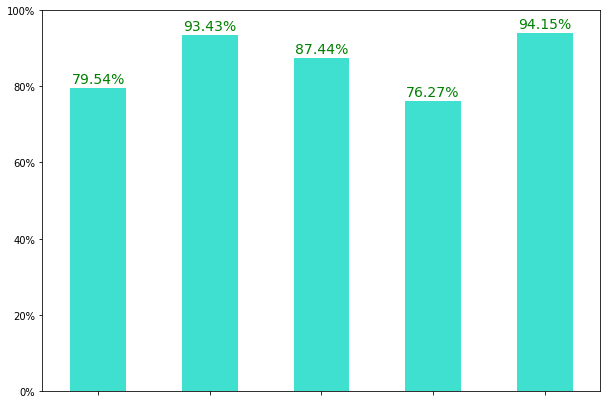

In [187]:
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(10,7)) 
df.plot(kind="bar", x="name", color='turquoise', legend=None, ax=ax)

# バーの上に数値を表示
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+0.25, i.get_height()+0.005,
            str(round(i.get_height()*100, 2))+'%',
            fontsize=14,
            horizontalalignment='center',
            verticalalignment='bottom',
            color='green')

# Y軸をpercent表記に
def _to_percent(x, position):
    return '{:.{}f}%'.format(x*100,0)
formatter = FuncFormatter(_to_percent)
ax.yaxis.set_major_formatter(formatter)

# Y軸の最小値と最大値を定義
plt.ylim(0,1)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticklabels([])

plt.show(ax)